In [1]:
import os
from torch.utils.data import DataLoader
import torch
import ipdb

from tqdm import tqdm

from trajdata import AgentBatch, AgentType, UnifiedDataset

import sys

sys.path.append(os.path.join(os.getcwd(), '..'))

from  trajdata_utils.interactive_vis import plot_agent_batch_interactive
from trajdata_utils.vis import plot_agent_batch
from trajdata_utils.interactive_animation import (
    InteractiveAnimation,
    animate_agent_batch_interactive,
)
from ldm.models.diffusion.diffusion import GaussianDiffusion
from ldm.modules.diffusionmodules.trajunet import UNetModel
from diffuser.utils.training_ped import Trainer
import time
import copy
from collections import defaultdict
import torch
torch.manual_seed(0)

pybullet build time: May 20 2022 19:44:17


[ models/temporal ] Channel dimensions: [(4, 32), (32, 64), (64, 128), (128, 256)]
[(4, 32), (32, 64), (64, 128), (128, 256)]
> /home/kazuki/diffuser/ldm/models/diffusion/diffusion.py(359)weight_sample_loop()
    358                     ipdb.set_trace()
--> 359                     cvxopt.solvers.options['show_progress'] = False
    360                     dx = dx.squeeze()



ipdb>  print(i)


50


ipdb>  min


tensor(-8.6958, device='cuda:0')


ipdb>  n


> /home/kazuki/diffuser/ldm/models/diffusion/diffusion.py(360)weight_sample_loop()
    359                     cvxopt.solvers.options['show_progress'] = False
--> 360                     dx = dx.squeeze()
    361                     dy = dy.squeeze()



ipdb>  n


> /home/kazuki/diffuser/ldm/models/diffusion/diffusion.py(361)weight_sample_loop()
    360                     dx = dx.squeeze()
--> 361                     dy = dy.squeeze()
    362                     P = matrix(np.eye(2*horizon))



ipdb>  n


> /home/kazuki/diffuser/ldm/models/diffusion/diffusion.py(362)weight_sample_loop()
    361                     dy = dy.squeeze()
--> 362                     P = matrix(np.eye(2*horizon))
    363                     f = -1*x[:,2:,:].flatten()



ipdb>  n


> /home/kazuki/diffuser/ldm/models/diffusion/diffusion.py(363)weight_sample_loop()
    362                     P = matrix(np.eye(2*horizon))
--> 363                     f = -1*x[:,2:,:].flatten()
    364                     f = matrix(f.detach().cpu().numpy().astype(np.double))



ipdb>  n


> /home/kazuki/diffuser/ldm/models/diffusion/diffusion.py(364)weight_sample_loop()
    363                     f = -1*x[:,2:,:].flatten()
--> 364                     f = matrix(f.detach().cpu().numpy().astype(np.double))
    365                     G = np.zeros((horizon, 2*horizon))



ipdb>  n


> /home/kazuki/diffuser/ldm/models/diffusion/diffusion.py(365)weight_sample_loop()
    364                     f = matrix(f.detach().cpu().numpy().astype(np.double))
--> 365                     G = np.zeros((horizon, 2*horizon))
    366                     h = np.zeros((horizon))



ipdb>  n


> /home/kazuki/diffuser/ldm/models/diffusion/diffusion.py(366)weight_sample_loop()
    365                     G = np.zeros((horizon, 2*horizon))
--> 366                     h = np.zeros((horizon))
    367                     # dis = dx**2 + dy**2



ipdb>  n


> /home/kazuki/diffuser/ldm/models/diffusion/diffusion.py(369)weight_sample_loop()
    368                     # min_idx = torch.argmin(dis, axis=0)
--> 369                     min_idx = torch.argmin(V, axis=1).squeeze()
    370                     for j in range(horizon):



ipdb>  n


> /home/kazuki/diffuser/ldm/models/diffusion/diffusion.py(370)weight_sample_loop()
    369                     min_idx = torch.argmin(V, axis=1).squeeze()
--> 370                     for j in range(horizon):
    371                         G[j][2*j] = -2 * dx[min_idx[j], j]



ipdb>  n


> /home/kazuki/diffuser/ldm/models/diffusion/diffusion.py(371)weight_sample_loop()
    370                     for j in range(horizon):
--> 371                         G[j][2*j] = -2 * dx[min_idx[j], j]
    372                         G[j][2*j+1] = -2 * dy[min_idx[j], j]



ipdb>  n


> /home/kazuki/diffuser/ldm/models/diffusion/diffusion.py(372)weight_sample_loop()
    371                         G[j][2*j] = -2 * dx[min_idx[j], j]
--> 372                         G[j][2*j+1] = -2 * dy[min_idx[j], j]
    373                         h[j] = (dx[min_idx[j], j]**2 + dy[min_idx[j], j]**2 - r**2)**p



ipdb>  n


> /home/kazuki/diffuser/ldm/models/diffusion/diffusion.py(373)weight_sample_loop()
    372                         G[j][2*j+1] = -2 * dy[min_idx[j], j]
--> 373                         h[j] = (dx[min_idx[j], j]**2 + dy[min_idx[j], j]**2 - r**2)**p
    374                     G = matrix(G)



ipdb>  n


> /home/kazuki/diffuser/ldm/models/diffusion/diffusion.py(370)weight_sample_loop()
    369                     min_idx = torch.argmin(V, axis=1).squeeze()
--> 370                     for j in range(horizon):
    371                         G[j][2*j] = -2 * dx[min_idx[j], j]



ipdb>  n


> /home/kazuki/diffuser/ldm/models/diffusion/diffusion.py(371)weight_sample_loop()
    370                     for j in range(horizon):
--> 371                         G[j][2*j] = -2 * dx[min_idx[j], j]
    372                         G[j][2*j+1] = -2 * dy[min_idx[j], j]



ipdb>  n


> /home/kazuki/diffuser/ldm/models/diffusion/diffusion.py(372)weight_sample_loop()
    371                         G[j][2*j] = -2 * dx[min_idx[j], j]
--> 372                         G[j][2*j+1] = -2 * dy[min_idx[j], j]
    373                         h[j] = (dx[min_idx[j], j]**2 + dy[min_idx[j], j]**2 - r**2)**p



ipdb>  n


> /home/kazuki/diffuser/ldm/models/diffusion/diffusion.py(373)weight_sample_loop()
    372                         G[j][2*j+1] = -2 * dy[min_idx[j], j]
--> 373                         h[j] = (dx[min_idx[j], j]**2 + dy[min_idx[j], j]**2 - r**2)**p
    374                     G = matrix(G)



ipdb>  n


> /home/kazuki/diffuser/ldm/models/diffusion/diffusion.py(370)weight_sample_loop()
    369                     min_idx = torch.argmin(V, axis=1).squeeze()
--> 370                     for j in range(horizon):
    371                         G[j][2*j] = -2 * dx[min_idx[j], j]



ipdb>  n


> /home/kazuki/diffuser/ldm/models/diffusion/diffusion.py(371)weight_sample_loop()
    370                     for j in range(horizon):
--> 371                         G[j][2*j] = -2 * dx[min_idx[j], j]
    372                         G[j][2*j+1] = -2 * dy[min_idx[j], j]



ipdb>  n


> /home/kazuki/diffuser/ldm/models/diffusion/diffusion.py(372)weight_sample_loop()
    371                         G[j][2*j] = -2 * dx[min_idx[j], j]
--> 372                         G[j][2*j+1] = -2 * dy[min_idx[j], j]
    373                         h[j] = (dx[min_idx[j], j]**2 + dy[min_idx[j], j]**2 - r**2)**p



ipdb>  c


> /home/kazuki/diffuser/ldm/models/diffusion/diffusion.py(358)weight_sample_loop()
    357                 if min < -i*0.1:
--> 358                     ipdb.set_trace()
    359                     cvxopt.solvers.options['show_progress'] = False



ipdb>  min


tensor(-8.4916, device='cuda:0')


ipdb>  print(i)


0


ipdb>  c


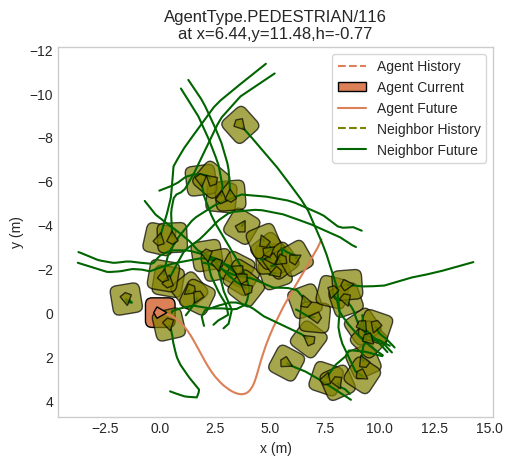

<Axes: title={'center': 'AgentType.PEDESTRIAN/116\nat x=6.44,y=11.48,h=-0.77'}, xlabel='x (m)', ylabel='y (m)'>

In [2]:
torch.manual_seed(0)
# See below for a list of already-supported datasets and splits.
dataset = UnifiedDataset(
    desired_data=["eupeds_eth", "eupeds_hotel", "eupeds_univ", "eupeds_zara1", "eupeds_zara2"],
    data_dirs={  # Remember to change this to match your filesystem!
        "eupeds_eth": "~/traj_dataset/eth-uty",
        "eupeds_hotel": "~/traj_dataset/eth-uty",
        "eupeds_univ": "~/traj_dataset/eth-uty",
        "eupeds_zara1": "~/traj_dataset/eth-uty",
        "eupeds_zara2": "~/traj_dataset/eth-uty",
    },
    history_sec =(0.0,  0.0), 
    future_sec =(15.9,  15.9),
    desired_dt=0.1,
    agent_interaction_distances=defaultdict(lambda: 10.0),
)

dataloader = DataLoader(
    dataset,
    batch_size=1,
    shuffle=True,
    collate_fn=dataset.get_collate_fn(),
    num_workers=0, # This can be set to 0 for single-threaded loading, if desired.
)

horizon = 160

unet = UNetModel(
    horizon = horizon
).cuda()

diffusion = GaussianDiffusion(
    model = unet,
    horizon = horizon
).cuda()

timestr = time.strftime("%Y%m%d-%H%M")
output_path = "./logs/eupeds/"+timestr
trainer = Trainer(
    diffusion_model=diffusion,
    data_loader=dataloader,
    results_folder=output_path
)

trainer.load(0,'../logs/eupeds/diffuser2/latest.pt')

data = iter(dataloader)
for i, batch in enumerate(dataloader):
    if i==0:
        break
pos = torch.cat((batch.agent_hist.position, batch.agent_fut.position), axis=1).transpose(1,2).cuda()
vel = torch.cat((batch.agent_hist.velocity, batch.agent_fut.velocity), axis=1).transpose(1,2).cuda()


pos = pos/10
vel = vel/10
traj = torch.cat((pos, vel), axis=1)

start = [0, 0]
goal = [7, -5]

start = torch.tensor(start).unsqueeze(1)/10
goal = torch.tensor(goal).unsqueeze(1)/10
cond = torch.cat([start, goal], axis=1).cuda().unsqueeze(0)
pos_neigh = torch.cat((batch.agent_hist.position+batch.neigh_hist.position, batch.agent_fut.position+batch.neigh_fut.position), axis=2).transpose(2,3).cuda()
vel_neigh = torch.cat((batch.agent_hist.velocity+batch.neigh_hist.velocity, batch.agent_fut.velocity+batch.neigh_fut.velocity), axis=2).transpose(2,3).cuda()

# vel_neigh = torch.cat((batch.neigh_hist.velocity, batch.neigh_fut.velocity), axis=2).transpose(2,3).cuda()
# pos_neigh = torch.cat((batch.neigh_hist.position, batch.neigh_fut.position), axis=2).transpose(2,3).cuda()

neigh = torch.cat([pos_neigh, vel_neigh], axis=2)
neigh = neigh/10

rad = 2

rad = rad/10
traj_gen = diffusion.weight_sample(cond, neigh, rad, s=1, p=3, mode='min', apply_cbf=False, apply_cbf_mid=True, incl_vel=False, apply_norm=True)

traj_gen[:,:2,:] = (traj_gen[:,:2,:])*10
traj_gen[:,2:4,:] = traj_gen[:,2:4,:]*10
traj_gen = traj_gen.transpose(1,2)

batch_gen = copy.deepcopy(batch)
batch_gen.agent_hist.position = traj_gen[:,0,:2].cpu()
batch_gen.agent_fut.position = traj_gen[:,1:,:2].cpu()
batch_gen.agent_hist.velocity = traj_gen[:,0,2:].cpu()
batch_gen.agent_fut.velocity = traj_gen[:,1:,2:].cpu()

gen_pos = torch.zeros(traj_gen.shape[0], traj_gen.shape[1], 2)
for i in range(1, traj_gen.shape[1]):
    gen_pos[:,i,:] = gen_pos[:,i-1,:] + traj_gen[:,i,2:].cpu()*0.1

batch_gen.agent_hist.position = gen_pos[:,0,:].cpu()
batch_gen.agent_fut.position = gen_pos[:,1:,:].cpu()

# plot_agent_batch_interactive(batch, batch_idx=0, cache_path=dataset.cache_path)
plot_agent_batch(batch_gen, batch_idx=0)
# animation = InteractiveAnimation(
#             animate_agent_batch_interactive,
#             batch=batch_gen,
#             batch_idx=0,
#             cache_path=dataset.cache_path,
#         )
# animation.show()